DATASET DOWNLOAD AND EXTRACT

In [17]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
from utility import plot_confusion_matrix
import tensorflow.keras.layers as layer
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [18]:
seed = 1231829
tf.random.set_seed(seed)
np.random.seed(seed)

In [19]:
from data_loader import get_data
X_data, labels = get_data()

/Users/denisderonjic/Repos/ActivityRecognition/data_loader.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return (np.array(X_data), labels)


In [20]:
print(X_data.shape)
print(labels.shape)

(761,)
(761,)


FALLING


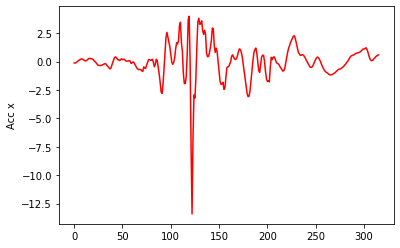

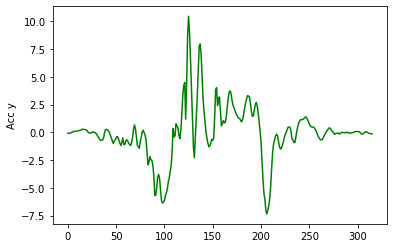

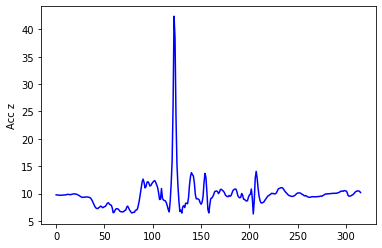

In [21]:
import matplotlib.pyplot as plt

measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [22]:
from data_transformation import frame_data

X_data, y_data = frame_data(X_data, labels)

In [23]:
X_data = X_data[:,:, :6] #Dropping magnetometer

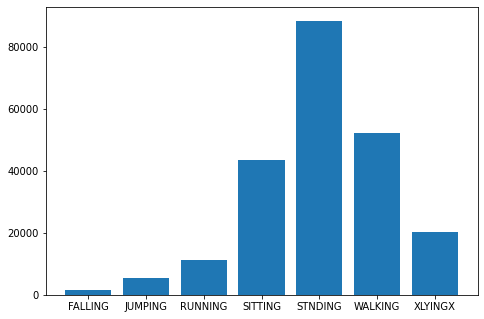

In [24]:
unique, counts = np.unique(y_data, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique,counts)
plt.show()

In [25]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

y_data = le.fit_transform(y_data)

In [26]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

num_labels = len(le_name_mapping)
print(num_labels)

{'FALLING': 0, 'JUMPING': 1, 'RUNNING': 2, 'SITTING': 3, 'STNDING': 4, 'WALKING': 5, 'XLYINGX': 6}
7


In [27]:
from data_transformation import data_normalization
X_visual_norm = data_normalization(X_data[:20])

Text(0.5, 1.0, 'Pred Acc 1')

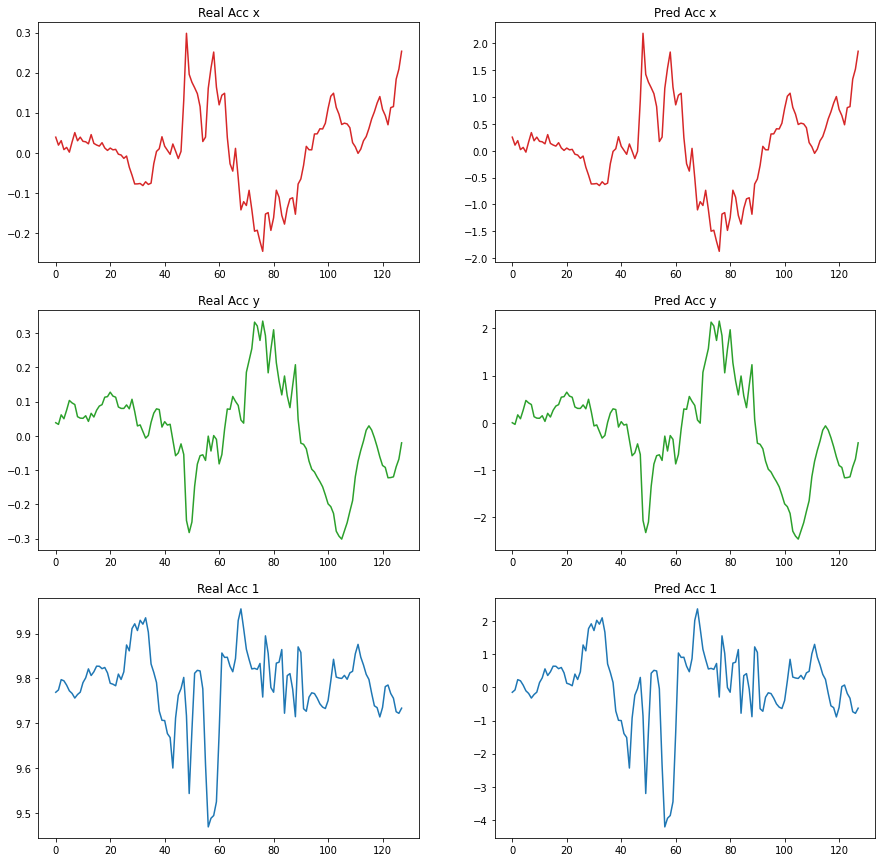

In [28]:
measure = 5
fig, axs = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_data[measure,:,0], 'tab:red')
axs[0, 0].set_title('Real Acc x')
axs[0, 1].plot(X_visual_norm[measure,:,0], 'tab:red')
axs[0, 1].set_title('Pred Acc x')

axs[1, 0].plot(X_data[measure,:,1], 'tab:green')
axs[1, 0].set_title('Real Acc y')
axs[1, 1].plot(X_visual_norm[measure,:,1], 'tab:green')
axs[1, 1].set_title('Pred Acc y')

axs[2, 0].plot(X_data[measure,:,2], 'tab:blue')
axs[2, 0].set_title('Real Acc 1')
axs[2, 1].plot(X_visual_norm[measure,:,2], 'tab:blue')
axs[2, 1].set_title('Pred Acc 1')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

stratifiedSplit = True

if stratifiedSplit:
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=seed)
    for train_index, test_index in split.split(X_data, y_data):
        X_train.append(X_data[train_index])
        y_train.append(y_data[train_index])
        X_test.append(X_data[test_index])
        y_test.append(y_data[test_index])
    X_train = np.array(X_train[0])
    y_train = np.array(y_train[0])
    X_test = np.array(X_test[0])
    y_test = np.array(y_test[0])
else:
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=seed)

In [30]:
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


Text(0.5, 1.0, 'Gyro z')

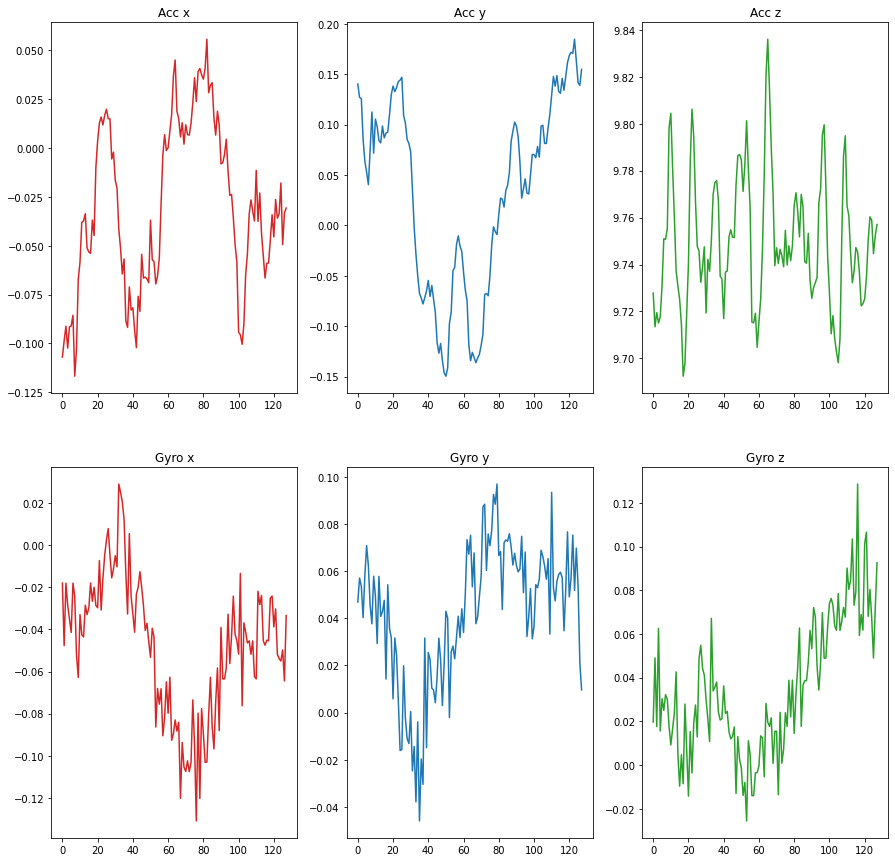

In [31]:
measure = 5
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
axs[0, 0].set_title('Acc x')
axs[0, 1].plot(X_train[measure,:,1], 'tab:blue')
axs[0, 1].set_title('Acc y')
axs[0, 2].plot(X_train[measure,:,2], 'tab:green')
axs[0, 2].set_title('Acc z')

axs[1, 0].plot(X_train[measure,:,3], 'tab:red')
axs[1, 0].set_title('Gyro x')
axs[1, 1].plot(X_train[measure,:,4], 'tab:blue')
axs[1, 1].set_title('Gyro y')
axs[1, 2].plot(X_train[measure,:,5], 'tab:green')
axs[1, 2].set_title('Gyro z')

In [32]:
from data_transformation import data_normalization
from data_transformation import min_max_scaler

X_train = data_normalization(X_train)
X_test = data_normalization(X_test)

In [33]:
print(X_train.shape)

(155666, 128, 6)


Text(0.5, 1.0, 'Gyro z')

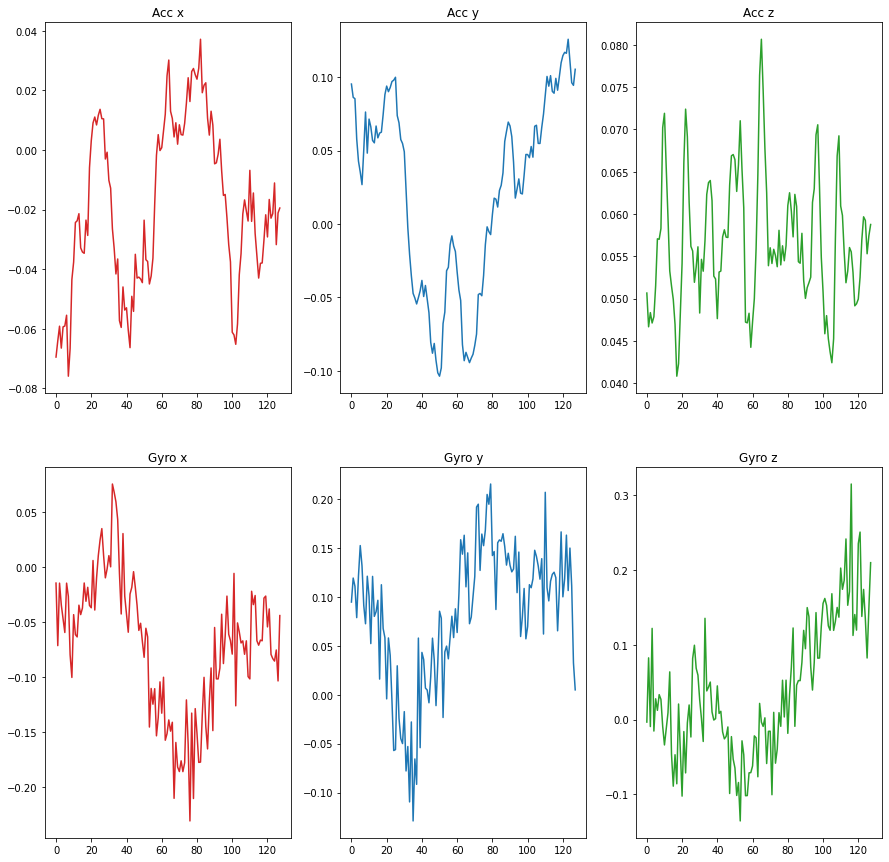

In [34]:
measure = 5
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
axs[0, 0].set_title('Acc x')
axs[0, 1].plot(X_train[measure,:,1], 'tab:blue')
axs[0, 1].set_title('Acc y')
axs[0, 2].plot(X_train[measure,:,2], 'tab:green')
axs[0, 2].set_title('Acc z')

axs[1, 0].plot(X_train[measure,:,3], 'tab:red')
axs[1, 0].set_title('Gyro x')
axs[1, 1].plot(X_train[measure,:,4], 'tab:blue')
axs[1, 1].set_title('Gyro y')
axs[1, 2].plot(X_train[measure,:,5], 'tab:green')
axs[1, 2].set_title('Gyro z')

In [35]:
from models import CVAE

encoded_space_dim = 64
autoencoder = CVAE(encoded_space_dim)

autoencoder(X_train[:10]).shape

TensorShape([10, 128, 6])

In [36]:
autoencoder.summary()

Model: "cvae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Sequential)         (None, 128)               170704    
_________________________________________________________________
decoder (Sequential)         (None, 128, 6)            783942    
Total params: 954,652
Trainable params: 954,646
Non-trainable params: 6
_________________________________________________________________


In [37]:
#autoencoder.encoder.summary()

In [38]:
#autoencoder.decoder.summary()

In [39]:
loss_object = tf.keras.losses.MeanSquaredError()

optimizer = tf.keras.optimizers.Adam()

autoencoder.compile(optimizer=optimizer, loss=loss_object)

In [40]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = autoencoder.fit(X_train, X_train,
                epochs=100,
                shuffle=True,
                batch_size=128,
                validation_split=0.2,
                callbacks=[callback]
                )

Epoch 1/100
973/973 [==============================] - 36s 37ms/step - loss: 127.5006 - reconstruction_loss: 124.6124 - kl_loss: 0.8063 - val_loss: 116.8267 - val_reconstruction_loss: 113.2504 - val_kl_loss: 3.5763
Epoch 2/100
973/973 [==============================] - 36s 37ms/step - loss: 113.1634 - reconstruction_loss: 104.4318 - kl_loss: 5.0286 - val_loss: 101.6710 - val_reconstruction_loss: 94.4803 - val_kl_loss: 7.1907
Epoch 3/100
973/973 [==============================] - 36s 37ms/step - loss: 97.5393 - reconstruction_loss: 87.2670 - kl_loss: 8.1064 - val_loss: 90.9035 - val_reconstruction_loss: 81.9359 - val_kl_loss: 8.9675
Epoch 4/100
973/973 [==============================] - 37s 38ms/step - loss: 90.4209 - reconstruction_loss: 79.2861 - kl_loss: 8.8364 - val_loss: 86.0954 - val_reconstruction_loss: 76.9754 - val_kl_loss: 9.1200
Epoch 5/100
973/973 [==============================] - 36s 37ms/step - loss: 83.7755 - reconstruction_loss: 74.7472 - kl_loss: 9.1820 - val_loss: 83.

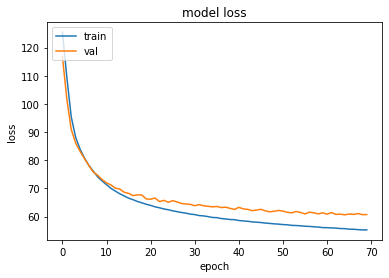

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [42]:
X_trans = autoencoder(X_test[:1000])


STNDING


Text(0.5, 1.0, 'Pred Acc 1')

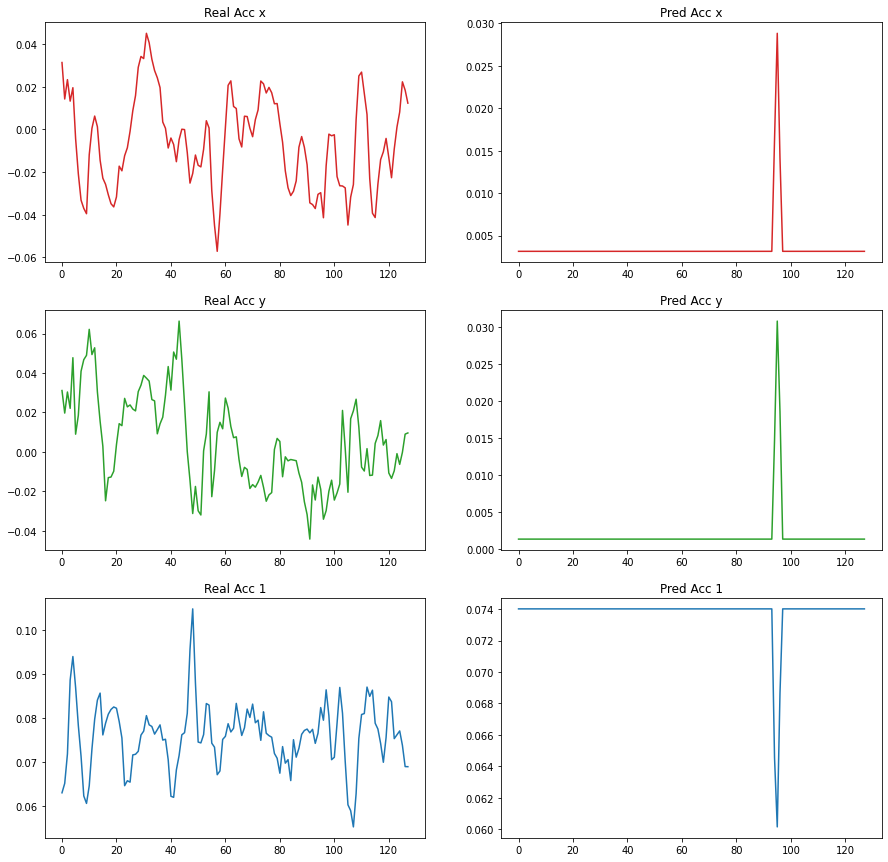

In [43]:
measure = 719
label_measured = y_train[measure]
print(le.inverse_transform([label_measured])[0])
fig, axs = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_test[measure,:,0], 'tab:red')
axs[0, 0].set_title('Real Acc x')
axs[0, 1].plot(X_trans[measure,:,0], 'tab:red')
axs[0, 1].set_title('Pred Acc x')

axs[1, 0].plot(X_test[measure,:,1], 'tab:green')
axs[1, 0].set_title('Real Acc y')
axs[1, 1].plot(X_trans[measure,:,1], 'tab:green')
axs[1, 1].set_title('Pred Acc y')

axs[2, 0].plot(X_test[measure,:,2], 'tab:blue')
axs[2, 0].set_title('Real Acc 1')
axs[2, 1].plot(X_trans[measure,:,2], 'tab:blue')
axs[2, 1].set_title('Pred Acc 1')






In [45]:
### Get the encoded representation of the test samples
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(10000).batch(1000)
encoded_samples = []
labels = []
for sample, label in test_dataset:
    output = autoencoder.encoder(sample)
    
    # Append to list
    encoded = output.numpy()
    for i in range(len(encoded)):
      enc = encoded[i]
      lbl = label[i]
      encoded_samples.append(enc)
      labels.append(lbl)
    if len(encoded_samples) % 10000 == 0:
      break
labels = np.array(labels)

In [46]:
print(np.array(encoded_samples).shape)

(10000, 128)


In [47]:
from sklearn import manifold
tsne = manifold.TSNE(2, init='pca', random_state=0).fit_transform(encoded_samples)

In [48]:
labels = le.inverse_transform(labels) 

In [49]:
import plotly.express as px
px.scatter(x=tsne[:,0], y=tsne[:,1], color=labels, opacity=0.7)

In [51]:
for l in autoencoder.encoder.layers:
    l.trainable = False
linear =  tf.keras.models.Sequential([layer.Dense(512, activation='relu'), layer.Dense(num_labels, activation='softmax')])
model = tf.keras.models.Sequential([autoencoder.encoder, linear])
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam', loss=loss_function, metrics=['acc'])

In [52]:
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


In [53]:
history = model.fit(X_train, y_train,
                epochs=10,
                shuffle=True,
                batch_size=64,
                validation_split=0.2)

Epoch 1/10
1946/1946 [==============================] - 4s 2ms/step - loss: 0.7748 - acc: 0.6782 - val_loss: 0.7317 - val_acc: 0.6882
Epoch 2/10
1946/1946 [==============================] - 4s 2ms/step - loss: 0.7336 - acc: 0.6909 - val_loss: 0.7157 - val_acc: 0.6929
Epoch 3/10
1946/1946 [==============================] - 4s 2ms/step - loss: 0.7230 - acc: 0.6940 - val_loss: 0.7108 - val_acc: 0.6969
Epoch 4/10
1946/1946 [==============================] - 4s 2ms/step - loss: 0.7165 - acc: 0.6958 - val_loss: 0.7098 - val_acc: 0.6971
Epoch 5/10
1946/1946 [==============================] - 4s 2ms/step - loss: 0.7118 - acc: 0.6984 - val_loss: 0.7193 - val_acc: 0.6974
Epoch 6/10
1946/1946 [==============================] - 4s 2ms/step - loss: 0.7079 - acc: 0.6988 - val_loss: 0.7049 - val_acc: 0.6993
Epoch 7/10
1946/1946 [==============================] - 4s 2ms/step - loss: 0.7058 - acc: 0.6998 - val_loss: 0.7045 - val_acc: 0.7009
Epoch 8/10
1946/1946 [==============================] - 4s 2ms

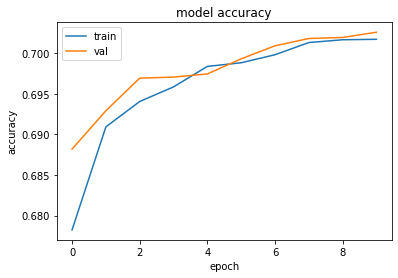

In [54]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [55]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)

2085/2085 - 2s - loss: 0.7058 - acc: 0.7073


In [56]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [57]:
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = converter.convert()
#with open('model.tflite', 'wb') as f:
#  f.write(tflite_model)

In [58]:
from sklearn.metrics import precision_score, recall_score

#None, 'micro', 'macro', 'weighted'
precisions = precision_score(y_test, y_pred, average=None)
recalls = recall_score(y_test, y_pred, average=None)
print("Precision score: ", precisions)
print("Recall score: ", recalls)

Precision score:  [0.8277512  0.88955823 0.96129801 0.69340159 0.58887032 0.9719332
 0.59574468]
Recall score:  [0.4032634  0.79580838 0.96996095 0.09364677 0.98296011 0.96764499
 0.0045864 ]


In [59]:
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": Precision " + str(precisions[i]) + " Recall " + str(recalls[i]))

FALLING: Precision 0.8277511961722488 Recall 0.40326340326340326
JUMPING: Precision 0.8895582329317269 Recall 0.795808383233533
RUNNING: Precision 0.9612980053587378 Recall 0.9699609492340042
SITTING: Precision 0.6934015927189988 Recall 0.09364676960897288
STNDING: Precision 0.5888703193459506 Recall 0.9829601146045389
WALKING: Precision 0.9719332048811817 Recall 0.9676449900888804
XLYINGX: Precision 0.5957446808510638 Recall 0.004586404586404586


In [60]:
from sklearn.metrics import f1_score

f1_scores = f1_score(y_test, y_pred, average=None)
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": F1-score " + str(f1_scores[i]))

FALLING: F1-score 0.542319749216301
JUMPING: F1-score 0.8400758533501896
RUNNING: F1-score 0.9656100478468901
SITTING: F1-score 0.16500846023688664
STNDING: F1-score 0.7365120614654539
WALKING: F1-score 0.9697843570764844
XLYINGX: F1-score 0.009102730819245773


In [61]:
import matplotlib.cm

def plot_confusion_matrix(predictions, labels, target_names):

  '''
  ============================
  Internal function definition
  ============================
  '''
  def _confusion_matrix(cm,
                            target_names,
                            title='Confusion matrix',
                            cmap=None):
      import itertools

      accuracy = np.trace(cm) / float(np.sum(cm))
      misclass = 1 - accuracy

      if cmap is None:
          cmap = plt.get_cmap('Reds')
      
      cm = cm.astype('float')
      for i in range(len(cm)):
        cm[i] /= float(np.sum(cm[i]))

      plt.figure(figsize=(16, 12))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()

      if target_names is not None:
          tick_marks = np.arange(len(target_names))
          plt.xticks(tick_marks, target_names, rotation=45)
          plt.yticks(tick_marks, target_names)


      thresh = cm.max() / 2
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                      horizontalalignment="center",
                      color="white" if cm[i, j] > thresh else "black")
              


      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
      plt.show()
  '''
  ===================================
  End of internal function definition
  ===================================
  '''

  from sklearn.metrics import confusion_matrix

  conf_mat = confusion_matrix(predictions, labels)
  _confusion_matrix(conf_mat, target_names=target_names)

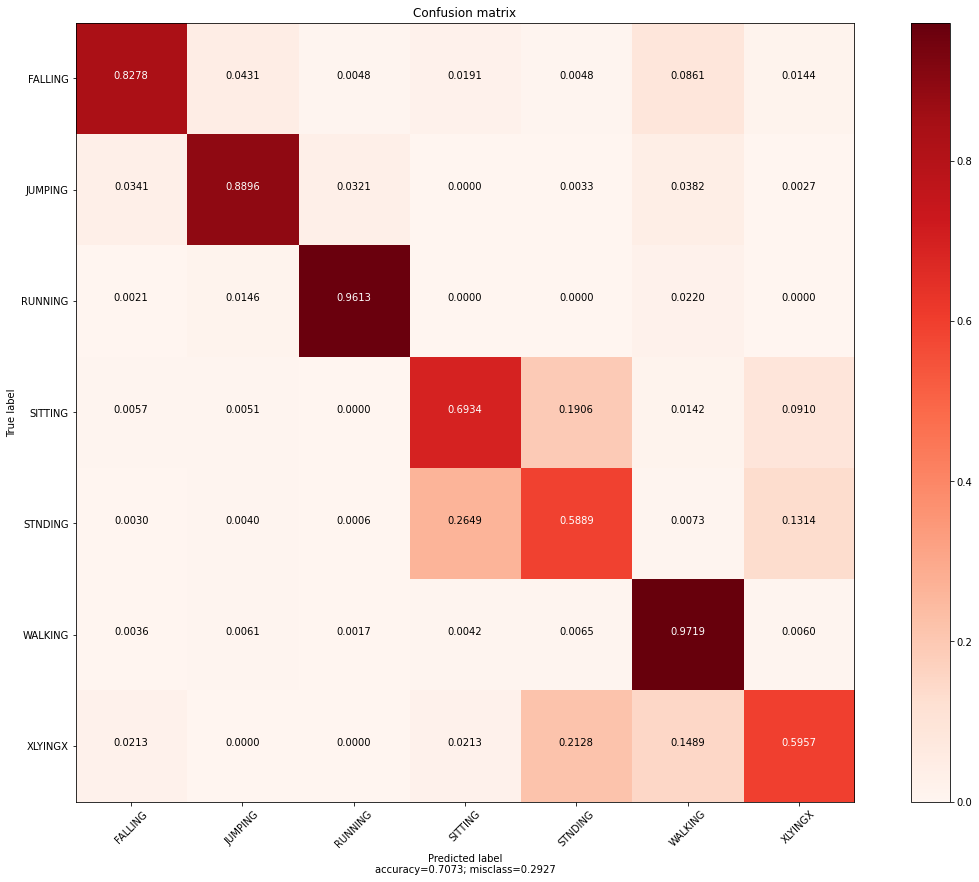

In [62]:
plot_confusion_matrix(y_pred, y_test, target_names=le.classes_)